# Problem Set 1: Analysis of racial disparities in felony sentencing

# 0. Load packages and imports

In [3]:
## basic functionality
import pandas as pd
import numpy as np
import re

## can add others if you need them

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## 0.1: Load the data (0 points)

Load the `sentencing_asof0405.csv` data

*Notes*: You may receive a warning about mixed data types upon import; feel free to ignore

In [5]:
df = sentencing_data = pd.read_csv("sentencing_asof0405.csv")

C:\Users\shoai\AppData\Local\Temp\ipykernel_33840\3628637005.py:1: DtypeWarning: Columns (10,11,14,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = sentencing_data = pd.read_csv("sentencing_asof0405.csv")


# Part one: data cleaning/interpretation

## 0.2: Print head, dimensions, info (0 points)

In [8]:
df.head()
df.ndim
df.info()

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510112469,116304211997,FIRST DEGREE MURDER,2,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
1,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510213021,98265074680,HOME INVASION,14,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
2,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516447217,131972895911,FIRST DEGREE MURDER,4,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
3,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516497493,131966356472,FIRST DEGREE MURDER,5,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
4,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516648320,98059642859,HOME INVASION,13,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide


2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248146 entries, 0 to 248145
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   CASE_ID                            248146 non-null  int64  
 1   CASE_PARTICIPANT_ID                248146 non-null  int64  
 2   RECEIVED_DATE                      248146 non-null  object 
 3   OFFENSE_CATEGORY                   248146 non-null  object 
 4   PRIMARY_CHARGE_FLAG                248146 non-null  bool   
 5   CHARGE_ID                          248146 non-null  int64  
 6   CHARGE_VERSION_ID                  248146 non-null  int64  
 7   DISPOSITION_CHARGED_OFFENSE_TITLE  248146 non-null  object 
 8   CHARGE_COUNT                       248146 non-null  int64  
 9   DISPOSITION_DATE                   248146 non-null  object 
 10  DISPOSITION_CHARGED_CHAPTER        248146 non-null  object 
 11  DISPOSITION_CHARGED_ACT            2427

## 1.1: Understanding the unit of analysis (5 points)

- Print the number of unique values for the following columns. Do so in a way that avoids copying/pasting code for 
the three:

    - Cases (`CASE_ID`)
    - People in that case (`CASE_PARTICIPANT_ID`)
    - Charges (`CHARGE_ID`)

- Write a couple sentences on the following and show an example of each (e.g., a case involving multiple people):
    
    - Why there are more unique people than unique cases?
    - Why there are more unique charges than unique people?

- Print the mean and median number of charges per case/participant 

- Print the mean and median number of participants per case

- Does the data seem to enable us to follow the same defendant across different cases they're charged in? Write 1 sentence in support of your conclusion.


In [11]:
df['CASE_ID'].nunique()

unique_values = df['CASE_PARTICIPANT_ID'].unique()
print(len(unique_values))

counter = 0
seen = set()
for x in df['CHARGE_ID']:
    if x not in seen: 
        counter = counter + 1
        seen.add(x) 
print(counter)

197519

211977
229015


In [ ]:
# Why more ppl than cases?
    # there can be a lot of people involved in one case
    # multiple people can belong to the same case (don't have to have an individual case for each person)
# Why more charges than ppl?
    # can be charged for multiple cases

In [7]:
charges_per_case = df.groupby('CASE_ID')['CHARGE_ID'].nunique()
charges_per_participant = df.groupby('CASE_PARTICIPANT_ID')['CHARGE_ID'].nunique()

mean_charges_per_case = charges_per_case.mean()
median_charges_per_case = charges_per_case.median()

mean_charges_per_participant = charges_per_participant.mean()
median_charges_per_participant = charges_per_participant.median()

print(mean_charges_per_case)
print(median_charges_per_case)
print(mean_charges_per_participant)
print(median_charges_per_participant)

# Group by case_participant_id and count the number of unique CASE_IDs for each
def check_participant_id_usage(dataframe):
    # Group by case_participant_id and count unique cases per participant
    participant_case_counts = dataframe.groupby('case_participant_id')['CASE_ID'].nunique().reset_index()

    # Filter for case_participant_ids that appear in more than one unique CASE_ID
    multiple_cases = participant_case_counts[participant_case_counts['CASE_ID'] > 1]

    if not multiple_cases.empty:
        print(f"Found {len(multiple_cases)} participants involved in multiple cases.")
        print(multiple_cases)
    else:
        print("No participants are involved in multiple cases.")

# Example usage
check_participant_id_usage(df)


1.1594580774507768
1.0
1.1261457610967227
1.0


KeyError: 'case_participant_id'

In [ ]:
# if the case_identifier_ID is unique to every single person, it would be easy to track them. 
# however, if it's dependent upon the case (and thus changes with each case), it wouldn't be a reliable indicator

# it looks like the case_identfier_ID is the same but it's the type of charges that is different, so i feel like it could very well be the same person given how the ID is the same 

## 1.2.1: Which offense is final? (3 points)

- First, read the data documentation [link](https://datacatalog.cookcountyil.gov/api/views/tg8v-tm6u/files/8597cdda-f7e1-44d1-b0ce-0a4e43f8c980?download=true&filename=CCSAO%20Data%20Glossary.pdf) and summarize in your own words the differences between `OFFENSE_CATEGORY` and `UPDATED_OFFENSE_CATEGORY` 

- Construct an indicator `is_changed_offense` that's True for case-participant-charge observations (rows) where there's a difference between the original charge (offense category) and the most current charge (updated offense category). What are some of the more common changed offenses? (can just print result of sort_values based on original offense category)

- Print one example of a changed offense from one of these categories and comment on what the reason may be


In [ ]:
# the OFFENSE_CATEGORY is the type of offense you're initially charged with; 
# UPDATED_OFFENSE_CATEGORY is the type of offense you're ultimately sentenced with 
# initial vs end result

In [162]:
# make the indicator
df["is_changed_offense"] = df["OFFENSE_CATEGORY"] != df["UPDATED_OFFENSE_CATEGORY"]

# filtering from day 2 google slides
changed_offenses = df[df["is_changed_offense"]]

# sort the values 
common_changed_offenses = changed_offenses.groupby("OFFENSE_CATEGORY").size().sort_values(ascending=False)

# most common 
print(common_changed_offenses)


OFFENSE_CATEGORY
PROMIS Conversion               6394
DUI                             3896
UUW - Unlawful Use of Weapon    2155
Other Offense                   2125
Aggravated Battery              1927
                                ... 
Perjury                            4
Prostitution                       3
Compelling Gang Membership         2
Violate Bail Bond                  2
Benefit Recipient Fraud            2
Length: 88, dtype: int64


In [117]:
example = changed_offenses[changed_offenses["OFFENSE_CATEGORY"] == common_changed_offenses.index[0]].head(1)
# is it the first row

print(example)

        CASE_ID  CASE_PARTICIPANT_ID          RECEIVED_DATE  \
0  149765331439         175691153649  8/15/1984 12:00:00 AM   

    OFFENSE_CATEGORY  PRIMARY_CHARGE_FLAG    CHARGE_ID  CHARGE_VERSION_ID  \
0  PROMIS Conversion                False  50510112469       116304211997   

  DISPOSITION_CHARGED_OFFENSE_TITLE  CHARGE_COUNT        DISPOSITION_DATE  \
0               FIRST DEGREE MURDER             2  12/17/2014 12:00:00 AM   

   ...   INCIDENT_BEGIN_DATE INCIDENT_END_DATE LAW_ENFORCEMENT_AGENCY  \
0  ...  8/9/1984 12:00:00 AM               NaN    CHICAGO POLICE DEPT   

  LAW_ENFORCEMENT_UNIT            ARREST_DATE      FELONY_REVIEW_DATE  \
0                  NaN  8/15/1984 12:00:00 AM  08/15/1984 12:00:00 AM   

  FELONY_REVIEW_RESULT       ARRAIGNMENT_DATE UPDATED_OFFENSE_CATEGORY  \
0   Charge(S) Approved  9/21/1984 12:00:00 AM                 Homicide   

  is_changed_offense  
0               True  

[1 rows x 42 columns]


## 1.2.2: Simplifying the charges (5 points)

Using the field (`UPDATED_OFFENSE_CATEGORY`), create a new field, `simplified_offense_derived`, that simplifies the many offense categories into broader buckets using the following process:

First, combine all offenses beginning with "Aggravated" into a single category without that prefix (e.g., Aggravated Battery and Battery just becomes Battery)

Then:
- Combine all offenses with arson into a single arson category (`Arson`)
- Combine all offenses with homicide into a single homicide category (`Homicide`)
- Combine all offenses with vehicle/vehicular in the name into a single vehicle category (`Vehicle-related`)
- Combine all offenses with battery in the name into a single battery category (`Battery`)

Try to do so efficiently (e.g., using map and a dictionary or np.select rather than separate line for each recoded offense)

Print the difference between the # of unique offenses in the original `UPDATED_OFFENSE_CATEGORY` field and the # of unique offenses in your new `simplified_offense_derived` field


In [306]:
# slice aggravated off (so it's the first like 11 chars
df['simplified_offense_derived'] = df['UPDATED_OFFENSE_CATEGORY'].apply(lambda x: x[11:] if x.startswith('Aggravated') else x)

conditions = [
    df['simplified_offense_derived'].str.contains('arson', case=False),           
    df['simplified_offense_derived'].str.contains('homicide', case=False),      
    df['simplified_offense_derived'].str.contains('vehicle|vehicular', case=False),
    df['simplified_offense_derived'].str.contains('battery', case=False)         
]

choices = [
    'Arson',             
    'Homicide',         
    'Vehicle-related',   
    'Battery'           
]

df['simplified_offense_derived'] = np.select(conditions, choices, default=df['simplified_offense_derived'])
unique_original = df['UPDATED_OFFENSE_CATEGORY'].nunique()
unique_simplified = df['simplified_offense_derived'].nunique()

print(unique_original - unique_simplified)

['Homicide' 'PROMIS Conversion' 'Narcotics' 'Retail Theft' 'Other Offense'
 'UUW - Unlawful Use of Weapon' 'Battery' 'Burglary' 'Sex Crimes'
 'Fleeing and Eluding' 'DUI' 'Home Invasion' 'Attempt Armed Robbery'
 'Arson' 'Theft' 'Driving With Suspended Or Revoked License'
 'Identity Theft' 'Forgery' 'Robbery' 'Vehicle-related' 'Fraudulent ID'
 'Criminal Damage to Property' 'Armed Robbery'
 'Escape - Failure to Return' 'Fraud'
 'Failure to Register as a Sex Offender' 'Discharge Firearm'
 'Credit Card Cases' 'Kidnapping' 'Residential Burglary'
 'Deceptive Practice' 'Violation Order Of Protection' 'Perjury'
 'Possession of Contraband in Penal Institution' 'Bribery' 'Dog Fighting'
 'Intimidation' 'Stalking' 'Pandering' 'Impersonating Police Officer'
 'Child Abduction' 'Disarming Police Officer' 'Violate Bail Bond'
 'Human Trafficking' 'Theft by Deception' 'Reckless Discharge of Firearm'
 'Criminal Trespass To Residence' 'Child Pornography' 'Prostitution'
 'Major Accidents' 'Gun Running' 'Ass

## 1.3: Cleaning additional variables (10 points)

Clean the following variables; make sure to retain the original variable in data and use the derived suffix so it's easier to pull these cleaned out variables later (e.g., `age_derived`) to indicate this was a transformation

- Race: create True/false indicators for `is_black_derived` (Black only or mixed race with hispanic), Non-Black Hispanic, so either hispanic alone or white hispanic (`is_hisp_derived`), White non-hispanic (`is_white_derived`), or none of the above (`is_othereth_derived`)

- Gender: create a boolean true/false indicator for `is_male_derived` (false is female, unknown, or other)

- Age at incident: you notice outliers like 130-year olds. Winsorsize the top 0.01% of values to be equal to the 99.99th percentile value pre-winsorization. Call this `age_derived`

- Create `sentenceymd_derived` that's a version of `SENTENCING_DATE` converted to datetime format. Also create a rounded version, `sentenceym_derived`, that's rounded down to the first of the month and the year (e.g., 01-05-2016 and 01-27-2016 each become 01-01-2016)
    - Hint: all timestamps are midnight so u can strip in conversion. For full credit, before converting, you notice that some of the years have been mistranscribed (e.g., 291X or 221X instead of 201X). Programatically fix those (eg 2914 -> 2014). Even after cleaning, there will still be some that are after the year 2021 that we'll filter out later. For partial credit, you can ignore the timestamps that cause errors and set errors = "coerce" within `pd.to_datetime()` to allow the conversion to proceed. 

- Sentencing judge: create an identifier (`judgeid_derived`) for each unique judge (`SENTENCE_JUDGE`) structured as judge_1, judge_2...., with the order determined by sorting the judges (will sort on fname then last). When finding unique judges, there are various duplicates we could weed out --- for now, just focus on (1) the different iterations of Doug/Douglas Simpson, (2) the different iterations of Shelley Sutker (who appears both with her maiden name and her hyphenated married name). 
     - Hint: due to mixed types, you may need to cast the `SENTENCE_JUDGE` var to a diff type to sort

After finishing, print a random sample of 10 rows (data.sample(n = 10)) with the original and cleaned columns for the relevant variables to validate your work

In [13]:
#Race 
df['is_black_derived'] = df.RACE.str.contains('Black', case=False, na=False)
df['is_hisp_derived'] = df.RACE.str.contains('Hispanic', case=False, na=False) & ~df.RACE.str.contains('Black', case=False, na=False)
df['is_white_derived'] = df.RACE.str.contains('White', case=False, na=False) & ~df.RACE.str.contains('Black', case=False, na=False) & ~df.RACE.str.contains('Hispanic', case=False, na=False)
df['is_othereth_derived'] = ~df['is_black_derived'] & ~df['is_hisp_derived'] & ~df['is_white_derived']

#Gender 
df['is_male_derived'] = df.GENDER.str.contains(r'\bMale\b', case=False, na=False, regex = True) 

#Age at Incident 
top_percentile = df.AGE_AT_INCIDENT.quantile(0.9999)
df['age_derived'] = df.AGE_AT_INCIDENT.apply(lambda x: top_percentile if x>top_percentile else x)

#Sentencing Date
df.SENTENCE_DATE = df.SENTENCE_DATE.str.replace("291", "201")
df.SENTENCE_DATE = df.SENTENCE_DATE.str.replace("221", "201")
df['sentenceymd_derived'] = pd.to_datetime(df['SENTENCE_DATE'])
df['sentenceym_derived'] = pd.to_datetime(df['sentenceymd_derived']).dt.to_period('M').dt.to_timestamp()

#Sentencing Judge
df.SENTENCE_JUDGE = df.SENTENCE_JUDGE.str.replace("Doug  Simpson", "Douglas J Simpson")
df.SENTENCE_JUDGE = df.SENTENCE_JUDGE.str.replace('Shelley  Sutker-Dermer', "Shelley Sutker-Dermer") 
df.SENTENCE_JUDGE = df.SENTENCE_JUDGE.str.replace('Shelley  Sutker', "Shelley Sutker-Dermer") 
sorted_judges = pd.Series(df.SENTENCE_JUDGE.unique()).sort_values()

df.SENTENCE_JUDGE.unique()
newdict = {}
x = 1 
for name in sorted_judges:
    newdict[name] = 'judge_' + str(x)
    x = x + 1 
df['judgeid_derived'] = df['SENTENCE_JUDGE'].map(newdict)

print(df.sample(n=10)[['RACE', 'is_black_derived', 'is_hisp_derived', 'is_white_derived', 'is_othereth_derived',
                   'GENDER', 'is_male_derived', 'AGE_AT_INCIDENT', 'age_derived', 
                   'SENTENCE_DATE', 'sentenceymd_derived', 'sentenceym_derived', 
                   'SENTENCE_JUDGE', 'judgeid_derived']])

C:\Users\shoai\AppData\Local\Temp\ipykernel_35392\2123006019.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sentenceymd_derived'] = pd.to_datetime(df['SENTENCE_DATE'])


array(['John  Mannion', 'Clayton Jay Crane', 'James L Rhodes',
       'Thomas V Gainer', 'Kay M Hanlon', 'William J Kunkle',
       'Evelyn B Clay', 'Timothy Joseph Joyce', 'Steven J Goebel',
       'Carol M Howard', 'Lawrence Edward Flood', 'Thomas R Sumner',
       'William H Hooks', 'Maura  Slattery Boyle',
       'Christopher J Donnelly', 'Thaddeus L Wilson', 'Michael P Toomin',
       'Sharon M Sullivan', 'Thomas P Fecarotta', 'Matthew E Coghlan',
       'Joseph Michael Claps', 'James R Epstein', 'Jorge Luis Alonso',
       'Kenneth J Wadas', 'Catherine Marie Haberkorn',
       'Vincent M Gaughan', 'Thomas M Davy', "James N O'Hara",
       'Raymond  Myles', "Joan Margaret O'Brien", 'Michele M Pitman',
       'John Joseph Hynes', 'Charles P Burns', 'James B Linn',
       'Arthur F Hill', 'Kevin M Sheehan', 'Diane Gordon Cannon',
       'Neera  Walsh', 'Dennis J Porter', 'Thomas M Tucker',
       'Timothy J Chambers', 'William G Lacy', 'Joseph G Kazmierski',
       'Erica L Reddick'

                              RACE  is_black_derived  is_hisp_derived  \
146115                       Black              True            False   
4334                      HISPANIC             False             True   
228696                       Black              True            False   
97796                        White             False            False   
218525                       Black              True            False   
181675                       Black              True            False   
193527  White [Hispanic or Latino]             False             True   
134911                       Black              True            False   
42667                        Black              True            False   
132773                       Black              True            False   

        is_white_derived  is_othereth_derived  GENDER  is_male_derived  \
146115             False                False    Male             True   
4334               False                False   

## 1.4: Subsetting rows to analytic dataset (5 points)

You decide based on the above to simplify things in the following ways:
    
- Subset to cases where only one participant is charged, since cases with >1 participant might have complications like 
plea bargains/informing from other participants affecting the sentencing of the focal participant

- To go from a participant-case level dataset, where each participant is repeated across charges tied to the case, to a participant-level dataset, where each participant has one charge, subset to a participant's primary charge and their current sentence (`PRIMARY_CHARGE_FLAG` is True and `CURRENT_SENTENCE_FLAG` is True). Double check that this worked by confirming there are no longer multiple charges for the same case-participant

- Filter out observations where judge is nan or nonsensical (indicated by is.null or equal to FLOOD)

- Subset to sentencing date between 01-01-2012 and 04-05-2021 (inclusive)

After completing these steps, print the number of rows in the data

In [382]:
df.CASE_ID = df.CASE_ID.drop_duplicates(keep=False)

df = df[(df['PRIMARY_CHARGE_FLAG'] == True) & (df['CURRENT_SENTENCE_FLAG'] == True)]

df = df[~df['SENTENCE_JUDGE'].isnull() & (df['SENTENCE_JUDGE'] != 'FLOOD')]

df = df[(df['sentenceymd_derived'] >= '2012-01-01') & (df['sentenceymd_derived'] <= '2021-04-05')]

print(len(df))

152906


# Part two: investigating Black vs. White sentencing disparities

Now that the data are cleaned, we're going to investigate different types of disparities in sentencing between Black defendants and White defendants. We're focusing on these groups for the purpose of the problem set, but the analysis could be extended to study Hispanic defendants or, in a different jurisdiction, Asian and other minoritized groups.

**Details if interested in digging deeper**: If interested (optional), you can read more technical coverage of how we might (1) measure disparities, and (2) what factors you want to adjust for when deciding whether two defendants are 'similarly situated' but for their race in the following sources:

- [Review of sentencing disparities research](https://www.journals.uchicago.edu/doi/full/10.1086/701505)
- [Discussion of causal model/blinding race at charging stage of the prosecutorial process](https://5harad.com/papers/blind-charging.pdf)
- [Discussion of measuring discrimination in policing that can generalize to the sentencing case](https://www.annualreviews.org/doi/abs/10.1146/annurev-criminol-011518-024731)
- [General discussion of causal challenges in measuring between-group disparities](https://osf.io/preprints/socarxiv/gx4y3/)

**One major caveat**: when investigating whether two similar defendants received different sentences, we're missing one important attribute that influences sentencing: the defendant's criminal history. This influences sentencing both through sentencing guidelines, which can prescribe longer sentences for those who have certain types of prior convictions, and through judicial discretion if judges are more lenient with first-time defendants. The above sources discuss how much we want to "control away" for this prior history, since if we think there are racial biases in which defendants, conditional on *committing* a crime, are arrested and charged, we may not want to adjust for that factor. More discussion [in this article](https://www.themarshallproject.org/2019/12/03/the-growing-racial-disparity-in-prison-time)


## 2.0: (0 points)

First, read in the following dataset (regardless of progress on part one): `sentencing_cleaned.pkl` (if you can't read in the pkl you can read in the .csv format but may need to recast some of the datetime columns)

*Note*: don't worry if there are slight differences in your output from Part One and this dataset/it's not a good use of time to try to reverse engineer Part One answers from this cleaned data.

In [15]:
df2 = sentencing_cleaned = pd.read_csv('sentencing_cleaned.csv')

C:\Users\shoai\AppData\Local\Temp\ipykernel_35392\910369694.py:1: DtypeWarning: Columns (10,11,16,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = sentencing_cleaned = pd.read_csv('sentencing_cleaned.csv')


## 2.1: Investigating one type of between-group difference: who reaches the sentencing stage? (5 points)

Tabulate and visualize the proportion of defendants, out of all defendants sentenced in a given month/year, who are Black and who are White (separate proportions)

- Denominator is number of unique cases that month
- Numerator for black defendants is count of is_black_derived
- Numerator for white defendants is count of is_white_derived
- Fraction of each is numerator/denominator

- Print the table
- Create a graph with two lines--- one for Black defendants as fraction of total; another for White defendants. Make sure it includes a legend summarizing which color is for which group, and clean the legend so that it has informative names (e.g., Black or White rather than prop_black or prop_white)
- Use mathematical notation to write out each of the proportions using summation notation in a 1-2 sentence writeup describing trends. What seems to be going on in April and May 2020? 

**Optional challenge**: improve the viz by shading the background of the visualization for months with fewer than 100 cases 

**Optional challenge**: improve the viz by adding a vertical line for 12-01-2016, the month that new State's Attorney Foxx took office 

C:\Users\shoai\AppData\Local\Temp\ipykernel_35392\3379485252.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['sentenceymd_derived'] = pd.to_datetime(df2['SENTENCE_DATE'])


    sentenceym_derived  prop_black  prop_white
0           2012-01-01    0.677419    0.144564
1           2012-02-01    0.648966    0.160690
2           2012-03-01    0.638958    0.158189
3           2012-04-01    0.696379    0.146936
4           2012-05-01    0.695146    0.144337
..                 ...         ...         ...
106         2020-11-01    0.606925    0.154786
107         2020-12-01    0.646182    0.158287
108         2021-01-01    0.621924    0.111857
109         2021-02-01    0.651731    0.134420
110         2021-03-01    0.680451    0.148496

[111 rows x 3 columns]
Maximum date in the data: 2021-03-01 00:00:00


<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Proportion of Black and White Defendants by Month/Year')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Proportion of Defendants')

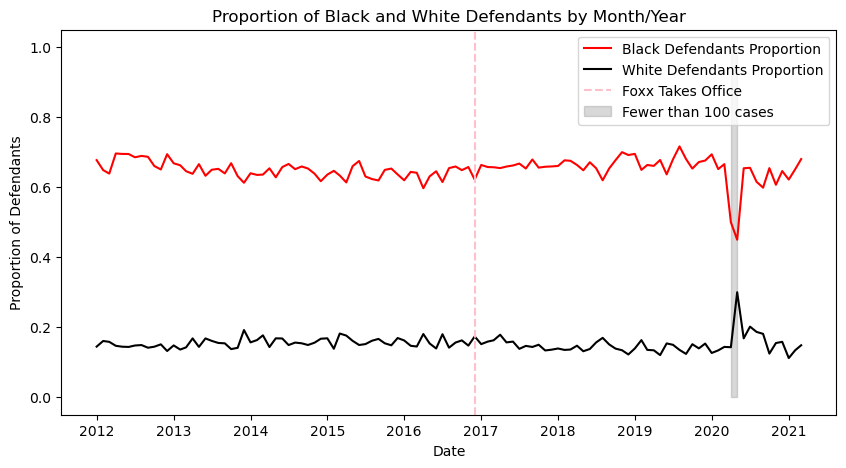

In [19]:
import matplotlib.pyplot as plt 
df2.SENTENCE_DATE = df2.SENTENCE_DATE.str.replace("291", "201")
df2.SENTENCE_DATE = df2.SENTENCE_DATE.str.replace("221", "201")
df2.SENTENCE_DATE = df2.SENTENCE_DATE.str.replace("211", "201")
df2['sentenceymd_derived'] = pd.to_datetime(df2['SENTENCE_DATE'])
df2['sentenceym_derived'] = pd.to_datetime(df2['sentenceymd_derived']).dt.to_period('M').dt.to_timestamp()

raceviz = df2.groupby('sentenceym_derived').agg(
    total_cases=('CASE_ID', 'nunique'),
    black_defendants=('is_black_derived', 'sum'),
    white_defendants=('is_white_derived', 'sum')
).reset_index()

raceviz['prop_black'] = raceviz['black_defendants'] / raceviz['total_cases']
raceviz['prop_white'] = raceviz['white_defendants'] / raceviz['total_cases']

print(raceviz[['sentenceym_derived', 'prop_black', 'prop_white']])

max_date = df2['sentenceym_derived'].max()
print("Maximum date in the data:", max_date)

plt.figure(figsize=(10, 5))

plt.plot(raceviz['sentenceym_derived'], raceviz['prop_black'], label='Black Defendants Proportion', color='red')

plt.plot(raceviz['sentenceym_derived'], raceviz['prop_white'], label='White Defendants Proportion', color='black')

plt.axvline(pd.Timestamp('2016-12-01'), color='pink', linestyle='--', label="Foxx Takes Office")

plt.fill_between(raceviz['sentenceym_derived'], 0, 1, where=raceviz['total_cases'] < 100, color='gray', alpha=0.3, label='Fewer than 100 cases')

plt.title('Proportion of Black and White Defendants by Month/Year')
plt.xlabel('Date')
plt.ylabel('Proportion of Defendants')
plt.legend(loc='upper right')

plt.show()

In [ ]:
# Proportion of Incarcerated Blacks = ∑black(defendants) for t-months / ∑cases for t-months
# Proportion of Incarcerated Whites = ∑white(defendants) for t-months / ∑cases for t-months

#It seems like the proportion of black defendants is always higher than the proportion of white defendants; however, during April to May 2020, 
#we see a sharp decrease of the proportion of black defendants but a sharp increase of the proportion of white defendants. This is probably due to 
#the fact that there were less than 100 cases (due to COVID disruptions) and isn't really representative data. The trend line shows a wide disparity
#between the proportions, depending on race, possibly due to racist sentencing policies. 

## 2.2: Investigating the first type of disparity: probation versus incaceration (10 points)

One type of disparity beyond who arrives at the sentencing stage is whether the defendant receives probation or incaceration.

According to the codebook, incarceration is indicated by `COMMITMENT_TYPE` == "Illinois Department of Corrections"

Recreate the previous plot but where the y axis represents the difference between the following proportions (can be either Black - White or White - Black but make sure to label), adding a smoothed line:

- Percent of black defendants who are incarcerated out of all black defendants that month/year 
- Percent of white defendants who are incarcerated out of all white defendants that month/year 

In a markdown cell after, write 1-2 sentences on your observations of trends over time. Do gaps seem to be widening or increasing?

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Difference in Incarceration Rates Between Black and White Defendants by Month/Year')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Difference in Proportions')

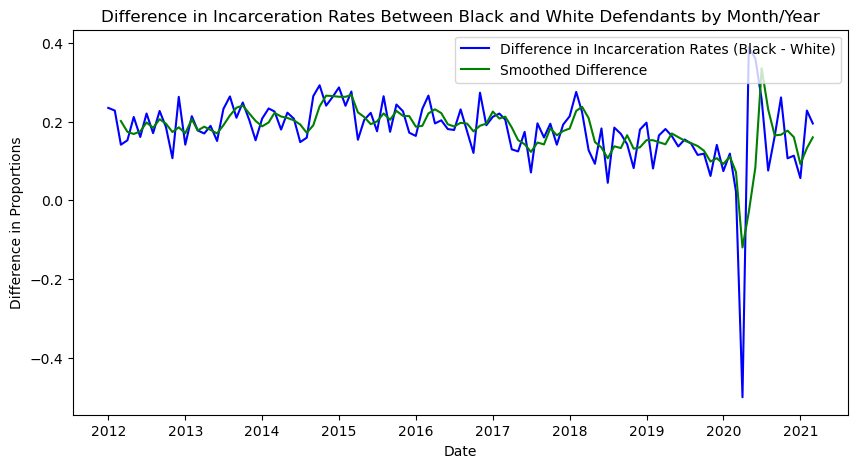

In [20]:
raceviz = df2.groupby('sentenceym_derived').agg(
    black_incarcerated=('COMMITMENT_TYPE', lambda x: ((x == "Illinois Department of Corrections") & (df2['is_black_derived'])).sum()),
    white_incarcerated=('COMMITMENT_TYPE', lambda x: ((x == "Illinois Department of Corrections") & (df2['is_white_derived'])).sum()),
    black_defendants=('is_black_derived', 'sum'),
    white_defendants=('is_white_derived', 'sum')
).reset_index()

raceviz['prop_incarcerated_black'] = raceviz['black_incarcerated'] / raceviz['black_defendants']
raceviz['prop_incarcerated_white'] = raceviz['white_incarcerated'] / raceviz['white_defendants']
raceviz['difference'] = raceviz['prop_incarcerated_black'] - raceviz['prop_incarcerated_white']
raceviz['smoothed_difference'] = raceviz['difference'].rolling(window=3).mean()

# Plot the data
plt.figure(figsize=(10, 5))

# Plot the difference
plt.plot(raceviz['sentenceym_derived'], raceviz['difference'], label='Difference in Incarceration Rates (Black - White)', color='blue')
plt.plot(raceviz['sentenceym_derived'], raceviz['smoothed_difference'], label='Smoothed Difference', color='green')

# Title and labels
plt.title('Difference in Incarceration Rates Between Black and White Defendants by Month/Year')
plt.xlabel('Date')
plt.ylabel('Difference in Proportions')
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [ ]:
# The gap is relatively stagnant before early 2020. But in early 2020, it seems that the gap shifted in the opposite direction, possibly due to COVID
# related disruptions; however, after the period there was a sharp increase in the gap. Since then, the gap continues to fluctutate but its peaks are 
# higher than before 2020 with greater fluctuations. 

## 2.3: Investigating mechanisms: incaceration rates by charge

Your colleague sees the previous graph and is worried that the gap could be different---either wider or smaller---if you adjust for the fact that prosecutors have discretion in what crimes to charge defendants with. If white defendants are charged with crimes that tend to receive probation rather than incarceration, that could explain some of the gaps.

In the next questions, you'll begin to investigate this.

### 2.3.1: Find the most common offenses (3 points)

First, create a set of 'frequent offenses' that represent (over the entire period) the union of the 10 offenses Black defendant are most likely to be charged with and the 10 offenses white defendants are most likely to be charged with (might be far less than 20 total if there's a lot of overlap in common charges)

Use the `simplified_offense_derived` for this

In [496]:
black = df2[df2['is_black_derived'] == 1]
white = df2[df2['is_white_derived'] == 1]
top_black = black['simplified_offense_derived'].value_counts().head(10).index
top_white = white['simplified_offense_derived'].value_counts().head(10).index
frequent_offenses = set(top_black).union(set(top_white))
print("Frequent Offenses (Union of Black and White defendants' top 10 offenses):")
print(frequent_offenses)

Frequent Offenses (Union of Black and White defendants' top 10 offenses):
{'Robbery', 'Theft', 'Vehicle-related', 'Battery', 'Driving With Suspended Or Revoked License', 'Other Offense', 'Residential Burglary', 'DUI', 'Burglary', 'Narcotics', 'UUW - Unlawful Use of Weapon', 'Retail Theft'}


### 2.3.2: Look at incarceration rates (again just whether incarcerated) by race and offense type for these top offenses (3 points)

Print a wide-format version of the resulting table (so each row is an offense type, one col is black incarceration rate for that offense type; another is the white incarceration rate) and interpret. Which offenses show the largest disparities in judges being less likely to sentence White defendants to incarceration/more likely to offer those defendants probation?


In [500]:
frequent2 = df2[df2['simplified_offense_derived'].isin(frequent_offenses)]
# ok so gotta calculate the rate so basically have to do the sum an dmake a proportion
def incarceration_rate(df2, race_col):
    incarcerated = df2[df2['COMMITMENT_TYPE'] == "Illinois Department of Corrections"]
    incarceration_rate = incarcerated[race_col].sum() / df[race_col].sum()
    return incarceration_rate

# now we gotta group and fill the black vs white rates
more_incar_rate = frequent2.groupby('simplified_offense_derived').apply(
    lambda x: pd.Series({
        'black_rate': incarceration_rate(x, 'is_black_derived'),
        'white_rate': incarceration_rate(x, 'is_white_derived')
    })
).reset_index()

# make the rates diffrentiated (so subtract b - w)
more_incar_rate['incarceration_rate_diff'] = more_incar_rate['black_rate'] - more_incar_rate['white_rate']
sorty = more_incar_rate.sort_values(by='incarceration_rate_diff', ascending=False)
# make the lil table
print("Offenses Showing the Largest Disparities")
print(sorty)

<function incarceration_rate at 0x0000013E179AD1C0>
Offenses Showing the Largest Disparities
                   simplified_offense_derived  black_rate  white_rate  \
4                                   Narcotics    0.157996    0.052398   
10               UUW - Unlawful Use of Weapon    0.066715    0.011147   
8                                     Robbery    0.015230    0.005793   
0                                     Battery    0.023608    0.017510   
11                            Vehicle-related    0.013255    0.009304   
3   Driving With Suspended Or Revoked License    0.025892    0.025278   
5                               Other Offense    0.004219    0.005749   
6                        Residential Burglary    0.016337    0.020582   
9                                       Theft    0.010123    0.015316   
7                                Retail Theft    0.040474    0.049502   
1                                    Burglary    0.025074    0.034186   
2                              

C:\Users\shoai\AppData\Local\Temp\ipykernel_2256\3802631823.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  more_incar_rate = frequent2.groupby('simplified_offense_derived').apply(


In [ ]:
# The offenses with the largest disparities in which white defendants are less likely to be incarcerated for compared to black defendants is 
# Narcotics (#1) followed by Unlawful Use of Weapon (#2) followed by Robbery (#3) 

### 2.3.3: Examine whether this changes pre and post change to charging threshold for retail theft (13 points)

One important question is not only whether there are disparities by offense type but also whether these disparities are changing over time.

The SAO, for instance, announced in December of 2016 that they would no longer default to charging retail thefts of under \$1,000 as felonies. This change might have (1) decreased disparities or (2) increased disparities, depending on the correlation between race/ethnicity and magnitude of goods stolen: [news coverage](https://www.dnainfo.com/chicago/20161215/little-village/kim-foxx-raises-bar-for-retail-theft-felonies/). 

Focusing on `simplified_offense_derived` == "Retail theft." Using a function and/or loop (Dec. 2016 is always excluded as a transition month):

- Compare Black-White disparities before and after the change using a two-month bandwidth (so pre is October and November 2016; post is January and February 2017)

- Compare Black-White disparities before and after the change using a four-month bandwidth (so pre is August- November 2016; post is January - April 2017)

- Compare Black-White disparities using an eight-month bandwidth

- Compare Black-White disparities using a twelve-month bandwidth


------------------ 

- Print a table with the results (any organization is fine as long as it's clear)  

- Create a bar chart where the x axis represents different bandwidths (2, 4, etc); the y axis the size of the Black-White gap in whether the defendant receives incarceration, and for each of the x axis points, you have one shaded bar representing "before" the change, another representing "after" the change (make sure that before is ordered before after and the bandwidths are from smallest to largest)

*Note*: for each of the bandwidths include dates the entire month (e.g., for the first, include not only 02-01-2017 but everything up through 02-28-2017; easiest way is for the subsetting to use the rounded `sentenceym_derived`). Also make sure to only include white or black defendants.


**Extra credit**: because the bandwidths have different sample sizes, a better viz incorporates measures of uncertainty. Add standard errors to the estimates using the formula: $(\dfrac{p(1-p)}{n})^{0.5}$ where $p$ is the gap and $N$ is the number of cases in each bandwidth period 


                    Disparity Before  Disparity After
Time Window                                          
2-month bandwidth           0.486361         0.420405
4-month bandwidth           0.426204         0.375245
8-month bandwidth           0.390051         0.403702
12-month bandwidth          0.409364         0.421391


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

([<matplotlib.axis.XTick at 0x13e1dcdbfe0>,
 [Text(0.2, 0, '2-month bandwidth'),
  Text(1.2, 0, '4-month bandwidth'),
  Text(2.2, 0, '8-month bandwidth'),
  Text(3.2, 0, '12-month bandwidth')])

Text(0.5, 1.0, 'Black-White Gap in Incarceration Rates Before and After Change')

Text(0.5, 0, 'Bandwidth')

Text(0, 0.5, 'Size of Black-White Gap in Incarceration')

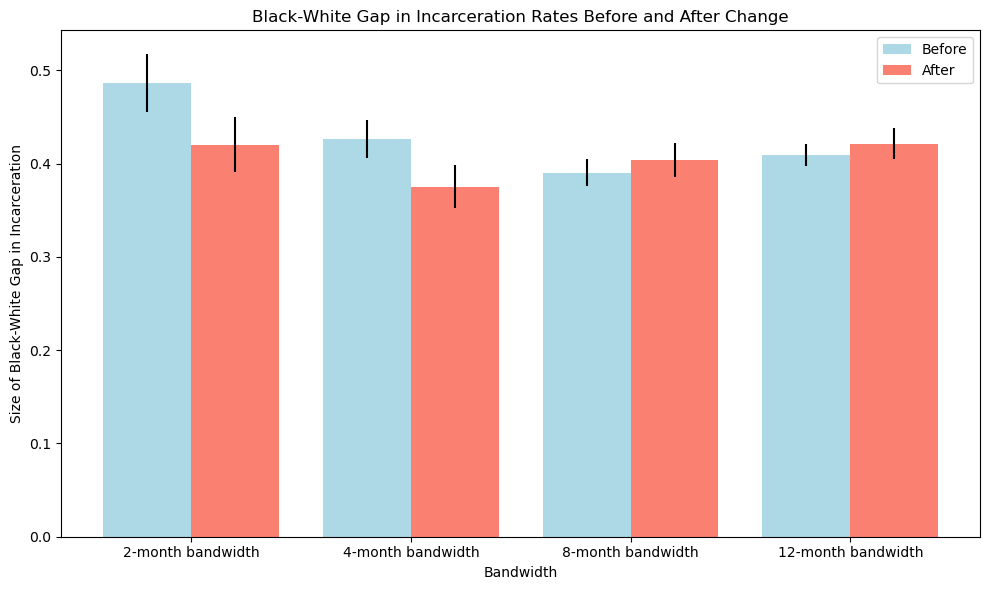

In [582]:
retail = df2[df2['simplified_offense_derived'] == 'Retail Theft']

def disparity_window(dataframe, pre_month_start, pre_month_end, post_month_start, post_month_end): 
        monthly_data = (dataframe.groupby(dataframe['sentenceymd_derived'].dt.to_period('M'))
                    .agg(total_cases=('CASE_ID', 'nunique'),
                         black_defendants=('is_black_derived', 'sum'),
                         white_defendants=('is_white_derived', 'sum'))
                    .reset_index())   
    
        monthly_data['prop_black'] = monthly_data['black_defendants'] / monthly_data['total_cases']
        monthly_data['prop_white'] = monthly_data['white_defendants'] / monthly_data['total_cases']

        pre_period = monthly_data[(monthly_data['sentenceymd_derived'] >= pre_month_start) & 
                              (monthly_data['sentenceymd_derived'] <= pre_month_end)]
        post_period = monthly_data[(monthly_data['sentenceymd_derived'] >= post_month_start) & 
                               (monthly_data['sentenceymd_derived'] <= post_month_end)]

        pre_black_mean = pre_period['prop_black'].mean()
        pre_white_mean = pre_period['prop_white'].mean()
        post_black_mean = post_period['prop_black'].mean()
        post_white_mean = post_period['prop_white'].mean()
        disparity_before = pre_black_mean - pre_white_mean
        disparity_after = post_black_mean - post_white_mean
        n_pre = pre_period['total_cases'].sum()
        n_post = post_period['total_cases'].sum()

        se_before = ((disparity_before * (1 - disparity_before)) / n_pre) ** 0.5 
        se_after = ((disparity_after * (1 - disparity_after)) / n_post) ** 0.5 

        return (disparity_before, disparity_after, se_before, se_after)

time_windows = {
    "2-month bandwidth": ('2016-10-01', '2016-11-30', '2017-01-01', '2017-02-28'),
    "4-month bandwidth": ('2016-08-01', '2016-11-30', '2017-01-01', '2017-04-30'),
    "8-month bandwidth": ('2016-04-01', '2016-11-30', '2017-01-01', '2017-09-30'),
    "12-month bandwidth": ('2015-12-01', '2016-11-30', '2017-01-01', '2017-12-31')
}

results = []

for label, (pre_start, pre_end, post_start, post_end) in time_windows.items():
    disparity_before, disparity_after, se_before, se_after = disparity_window(
        retail, 
        pre_month_start=pre_start, 
        pre_month_end=pre_end,
        post_month_start=post_start, 
        post_month_end=post_end
    )
    results.append({
        'Time Window': label,
        'Disparity Before': disparity_before,
        'Disparity After': disparity_after,
        'SE Before': se_before,
        'SE After': se_after
    })

results_df = pd.DataFrame(results)

results_table = results_df.set_index('Time Window')[['Disparity Before', 'Disparity After']]

print(results_table)

results_df = pd.DataFrame(results)

bandwidths = results_df['Time Window'].tolist()
before_values = results_df['Disparity Before'].tolist()
after_values = results_df['Disparity After'].tolist()
se_before = results_df['SE Before'].tolist()
se_after = results_df['SE After'].tolist()

x_before = range(len(bandwidths))
x_after = []
for p in x_before: 
    p = p + bar_width
    x_after.append(p)

x_ticks = []
for p in x_before: 
    p = p + bar_width/2
    x_ticks.append(p)

plt.figure(figsize=(10, 6))
bar_width = 0.4

plt.bar(x_before, before_values, width=bar_width, label='Before', yerr=se_before, color='lightblue')
plt.bar(x_after, after_values, width=bar_width, label='After', yerr=se_after, color='salmon')

plt.xticks(x_ticks, bandwidths)
plt.title('Black-White Gap in Incarceration Rates Before and After Change')
plt.xlabel('Bandwidth')
plt.ylabel('Size of Black-White Gap in Incarceration')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

### 2.3.3.1: Interpret the results (2 points)

Write a two-sentence interpretation of the results. What might this show about how people on both sides of the issue---those who argued that the retail theft policy change would narrow disparities; those who argued that the change may widen disparities--could support their claims? 

In [23]:
#For those who argued that the retail theft policy change would narrow disparities, it seems like if we are looking at only the 2-month and 4-month 
# bandwidth, then the policy after it was instated reduced the gap in incarceration between whites and blacks. However, for those who argued that the 
#policy would widen disparities, could say that in the 8-month and 12-month bandwidth, the gap in incarceration between whites and blacks after the 
# policy change, increased. 